## 5 Results and investment strategies on real data
### 5.3 Strategies study

In [1]:
import os
path = os.getcwd() + '/results/'

os.chdir('../')
from inference_nma_hmm.operations import *

import matplotlib.transforms as mtransforms

In [2]:
palette = sns.color_palette("husl", 6) 

##### Results recuperation

In [3]:
y, dates = np.load(path + 'y_msciworld_L0_monthly.npy'), np.load(path + 'dates_msciworld_L0_monthly.npy')
dates = [pd.to_datetime(d) for d in dates]

xb_L0, xc_L0 = np.load(path + 'xb_msciworld_L0_monthly.npy'), np.load(path + 'xc_msciworld_L0_monthly.npy')
xb_L2, xc_L2 = np.load(path + 'xb_msciworld_L2_monthly.npy'), np.load(path + 'xc_msciworld_L2_monthly.npy')
xb_L5, xc_L5 = np.load(path + 'xb_msciworld_L5_monthly.npy'), np.load(path + 'xc_msciworld_L5_monthly.npy')
xb_L8, xc_L8 = np.load(path + 'xb_msciworld_L8_monthly.npy'), np.load(path + 'xc_msciworld_L8_monthly.npy')
xb_L10, xc_L10 = np.load(path + 'xb_msciworld_L10_monthly.npy'), np.load(path + 'xc_msciworld_L10_monthly.npy')
xb_Lvar, xc_Lvar = np.load(path + 'xb_msciworld_Lvar_monthly.npy'), np.load(path + 'xc_msciworld_Lvar_monthly.npy')

In [4]:
xb_all, xc_all = [np.ones(len(xb_L0)), xb_L0, xb_L2, xb_L5, xb_L8, xb_L10, xb_Lvar], [np.ones(len(xc_L0)), xc_L0, xc_L2, xc_L5, xc_L8, xc_L10, xc_Lvar]
signal_all = ['Benchmark', 'HMM', 'MA(2)-HMM', 'MA(5)-HMM', 'MA(8)-HMM', 'MA(10)-HMM', 'MA(L)-HMM with model selection']

##### Sharpe ratio

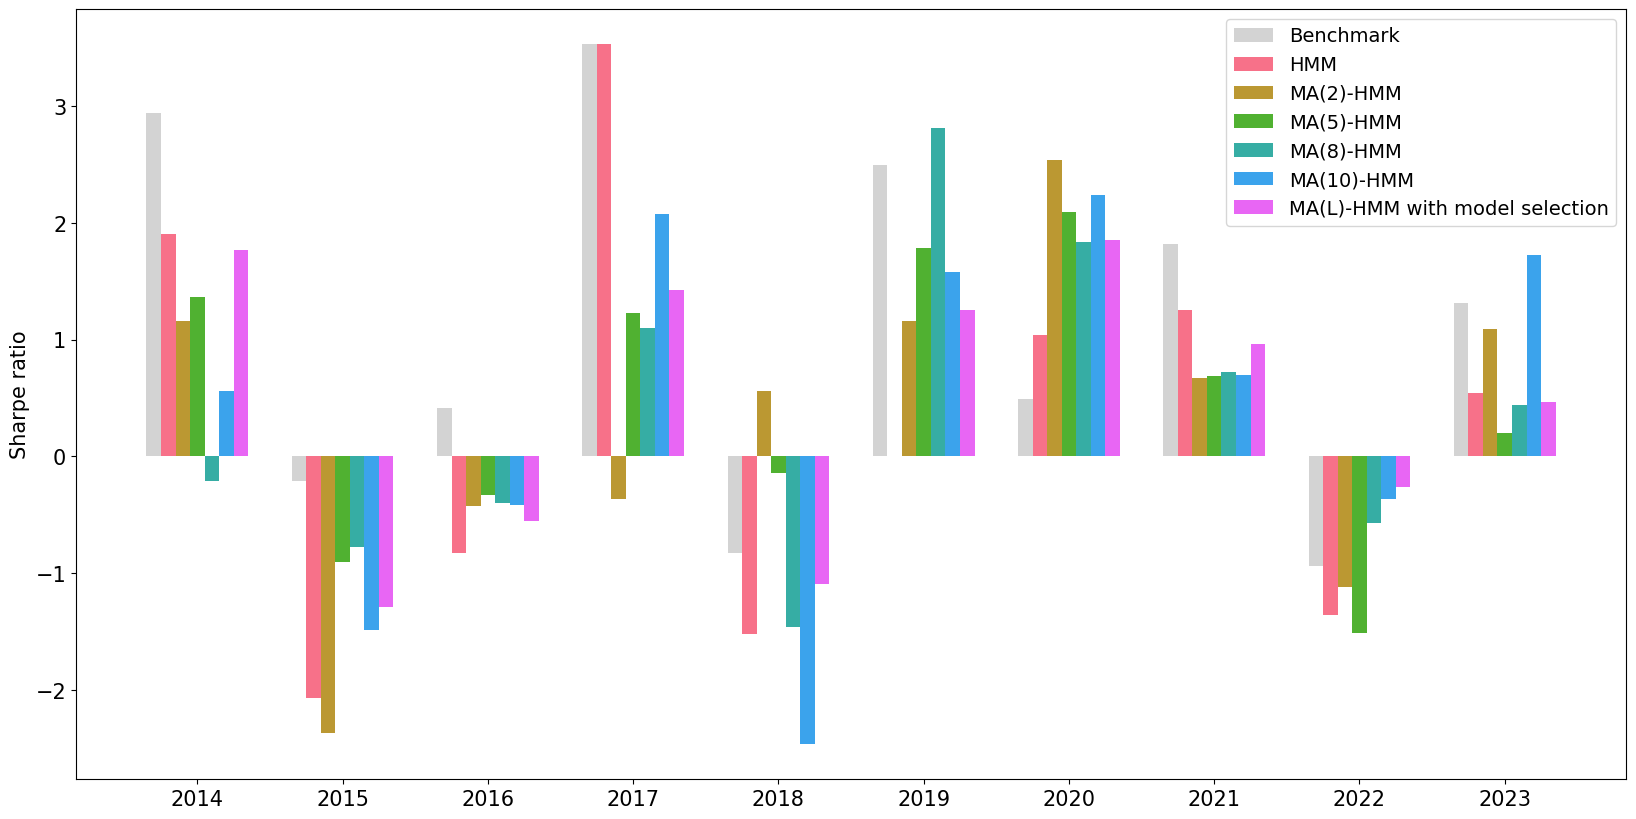

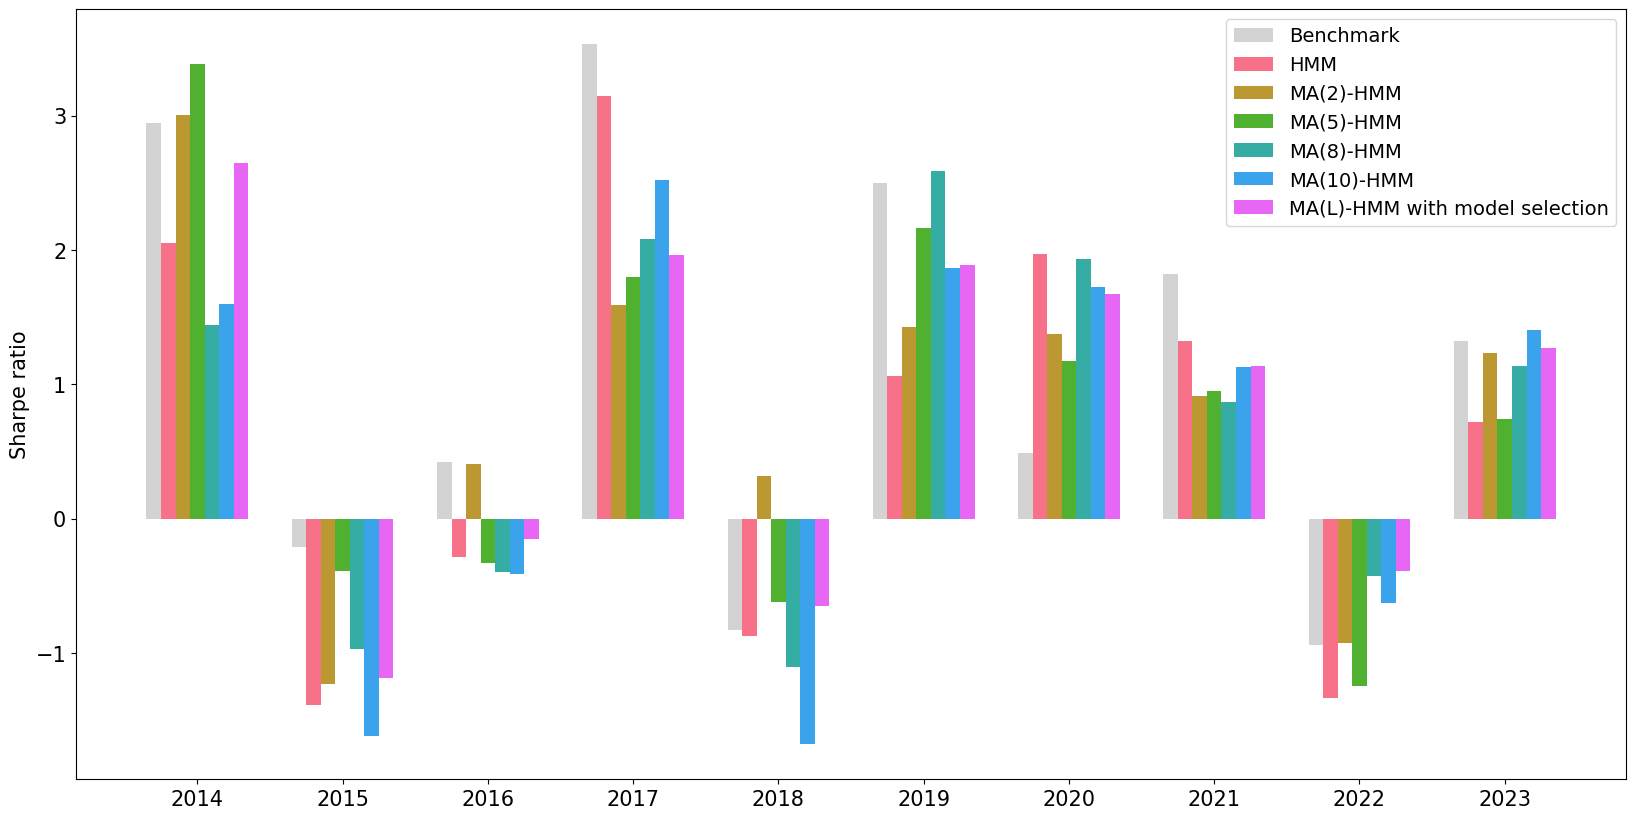

In [7]:
sr = [compute_sr_strat_yearly(x, pd.DataFrame(dates)[0], y, np.zeros(len(x)), fees = 0.002) for x in xb_all]

palette = sns.color_palette("husl", 6)
fig, ax = plt.subplots(figsize=(20, 10))
X = np.arange(len(sr[0]))
for i, r in enumerate(sr):
    if i == 0:
        ax.bar(X+i*0.1-0.3, r, color='lightgrey', width=0.1, label=signal_all[i])
    else:    
        ax.bar(X+i*0.1-0.3, r, color=palette[i-1], width=0.1, label=signal_all[i])
        
ax.set_ylabel('Sharpe ratio', fontsize=15)
ax.set_xticks(X)  
ax.set_xticklabels(pd.DataFrame(dates)[0].dt.year.unique()[1:], fontsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.legend(fontsize=14)
plt.show()

sr = [compute_sr_strat_yearly(x, pd.DataFrame(dates)[0], y, np.zeros(len(x))) for x in xc_all]

palette = sns.color_palette("husl", 6)
fig, ax = plt.subplots(figsize=(20, 10))
X = np.arange(len(sr[0]))
for i, r in enumerate(sr):
    if i == 0:
        ax.bar(X+i*0.1-0.3, r, color='lightgrey', width=0.1, label=signal_all[i])
    else:    
        ax.bar(X+i*0.1-0.3, r, color=palette[i-1], width=0.1, label=signal_all[i])
        
ax.set_ylabel('Sharpe ratio', fontsize=15)
ax.set_xticks(X)  
ax.set_xticklabels(pd.DataFrame(dates)[0].dt.year.unique()[1:], fontsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.legend(fontsize=14)
plt.show()